In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



Los depósitos a largo plazo son un producto importante para el banco porque permiten retener el dinero de los clientes durante un tiempo determinado. Esto le da al banco la posibilidad de usar esos fondos para invertir y mejorar su rentabilidad.

Actualmente, el banco portugués está pasando por una etapa donde sus ingresos están disminuyendo, y una de las causas es la baja contratación de depósitos a largo plazo. Por eso, el banco quiere mejorar su estrategia de marketing para enfocarse en los clientes que realmente tienen más probabilidades de contratar este producto.

Las campañas de marketing se hacen principalmente por llamadas telefónicas. Si el cliente no atiende, se vuelve a llamar más tarde. Este método implica mucho tiempo y recursos, sobre todo cuando se llama a personas que casi con seguridad no van a contratar el depósito.

La idea es crear un modelo de predicción que ayude a saber qué clientes tienen más posibilidades de decir “sí” al depósito a largo plazo. Así el banco podrá:

Enfocar sus esfuerzos en los clientes más propensos a aceptar.

Evitar gastar dinero y tiempo en llamadas poco efectivas.

Aumentar la tasa de éxito de las campañas.

El modelo se entrenará con datos de campañas anteriores, donde tenemos información del cliente (edad, trabajo, educación, si tiene préstamos, etc.), cómo se le contactó, y también algunos indicadores económicos del momento.

El objetivo final es que el banco pueda usar este modelo para priorizar a quién llamar primero y mejorar los resultados de sus campañas.

En este proyecto, lo más importante no es solo tener un modelo con alta precisión general, sino que logre identificar bien a los clientes que sí van a contratar. Es preferible llamar a alguien que finalmente no acepte, que dejar pasar a alguien que sí lo hubiera hecho.

In [68]:
df = pd.read_csv('/workspaces/marcoakai_machine_learning/data/raw/bank-marketing-campaign-data.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [70]:
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [71]:
df['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [72]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [73]:
df.columns = [c.strip().strip('"') for c in df.columns]
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.strip('"')

In [74]:
num_cols_guess = ["age","duration","campaign","pdays","previous","emp.var.rate",
                  "cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

for c in num_cols_guess:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

Variables Categóricas

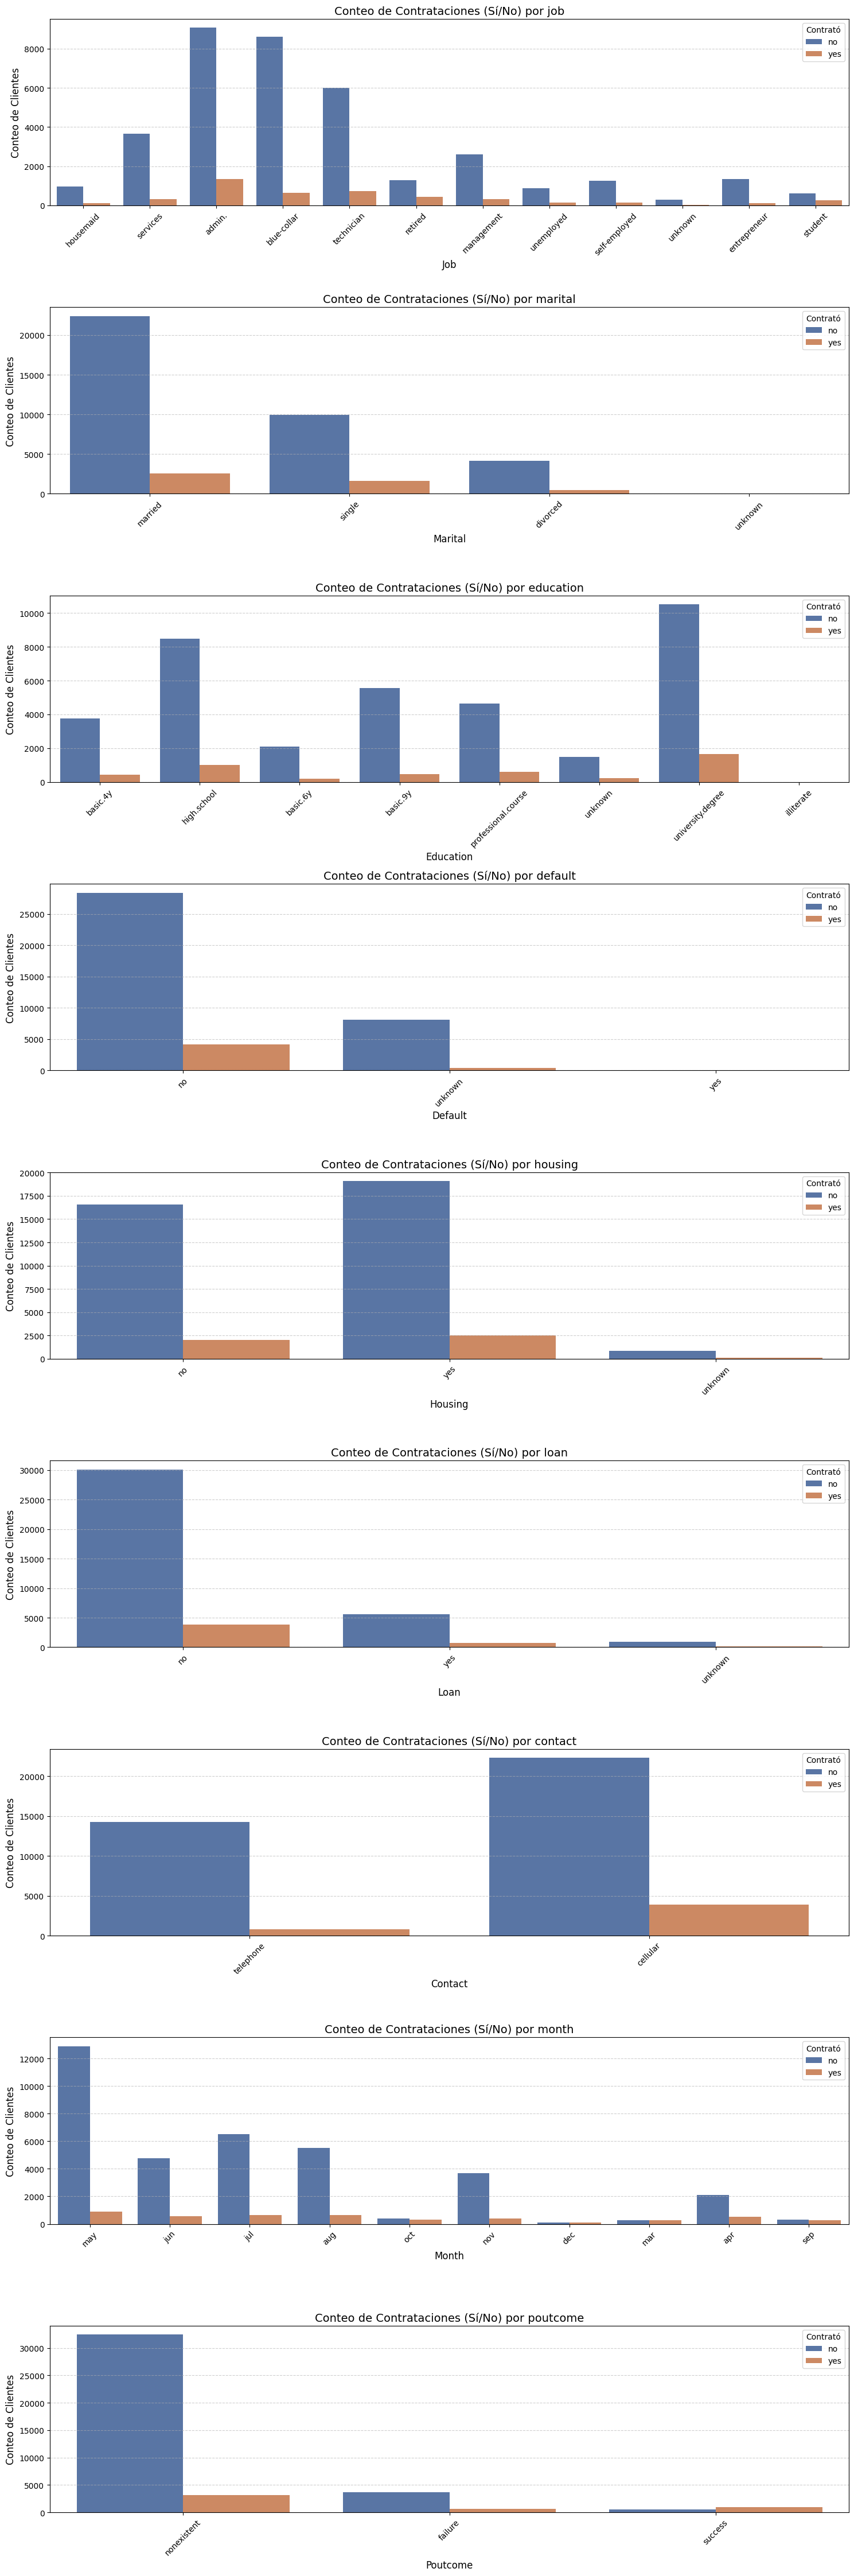

In [75]:
cat_colum = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(len(cat_colum), 1, figsize=(15, 5 * len(cat_colum)))

for i, col in enumerate(cat_colum):

    sns.countplot(data=df, x=col, hue='y', ax=axes[i], palette='deep')

    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(f'Conteo de Contrataciones (Sí/No) por {col}', fontsize=14)
    axes[i].set_ylabel('Conteo de Clientes', fontsize=12)
    axes[i].set_xlabel(col.capitalize(), fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

    axes[i].legend(title='Contrató', loc='upper right')

plt.tight_layout()
plt.show()

Variables numéricas

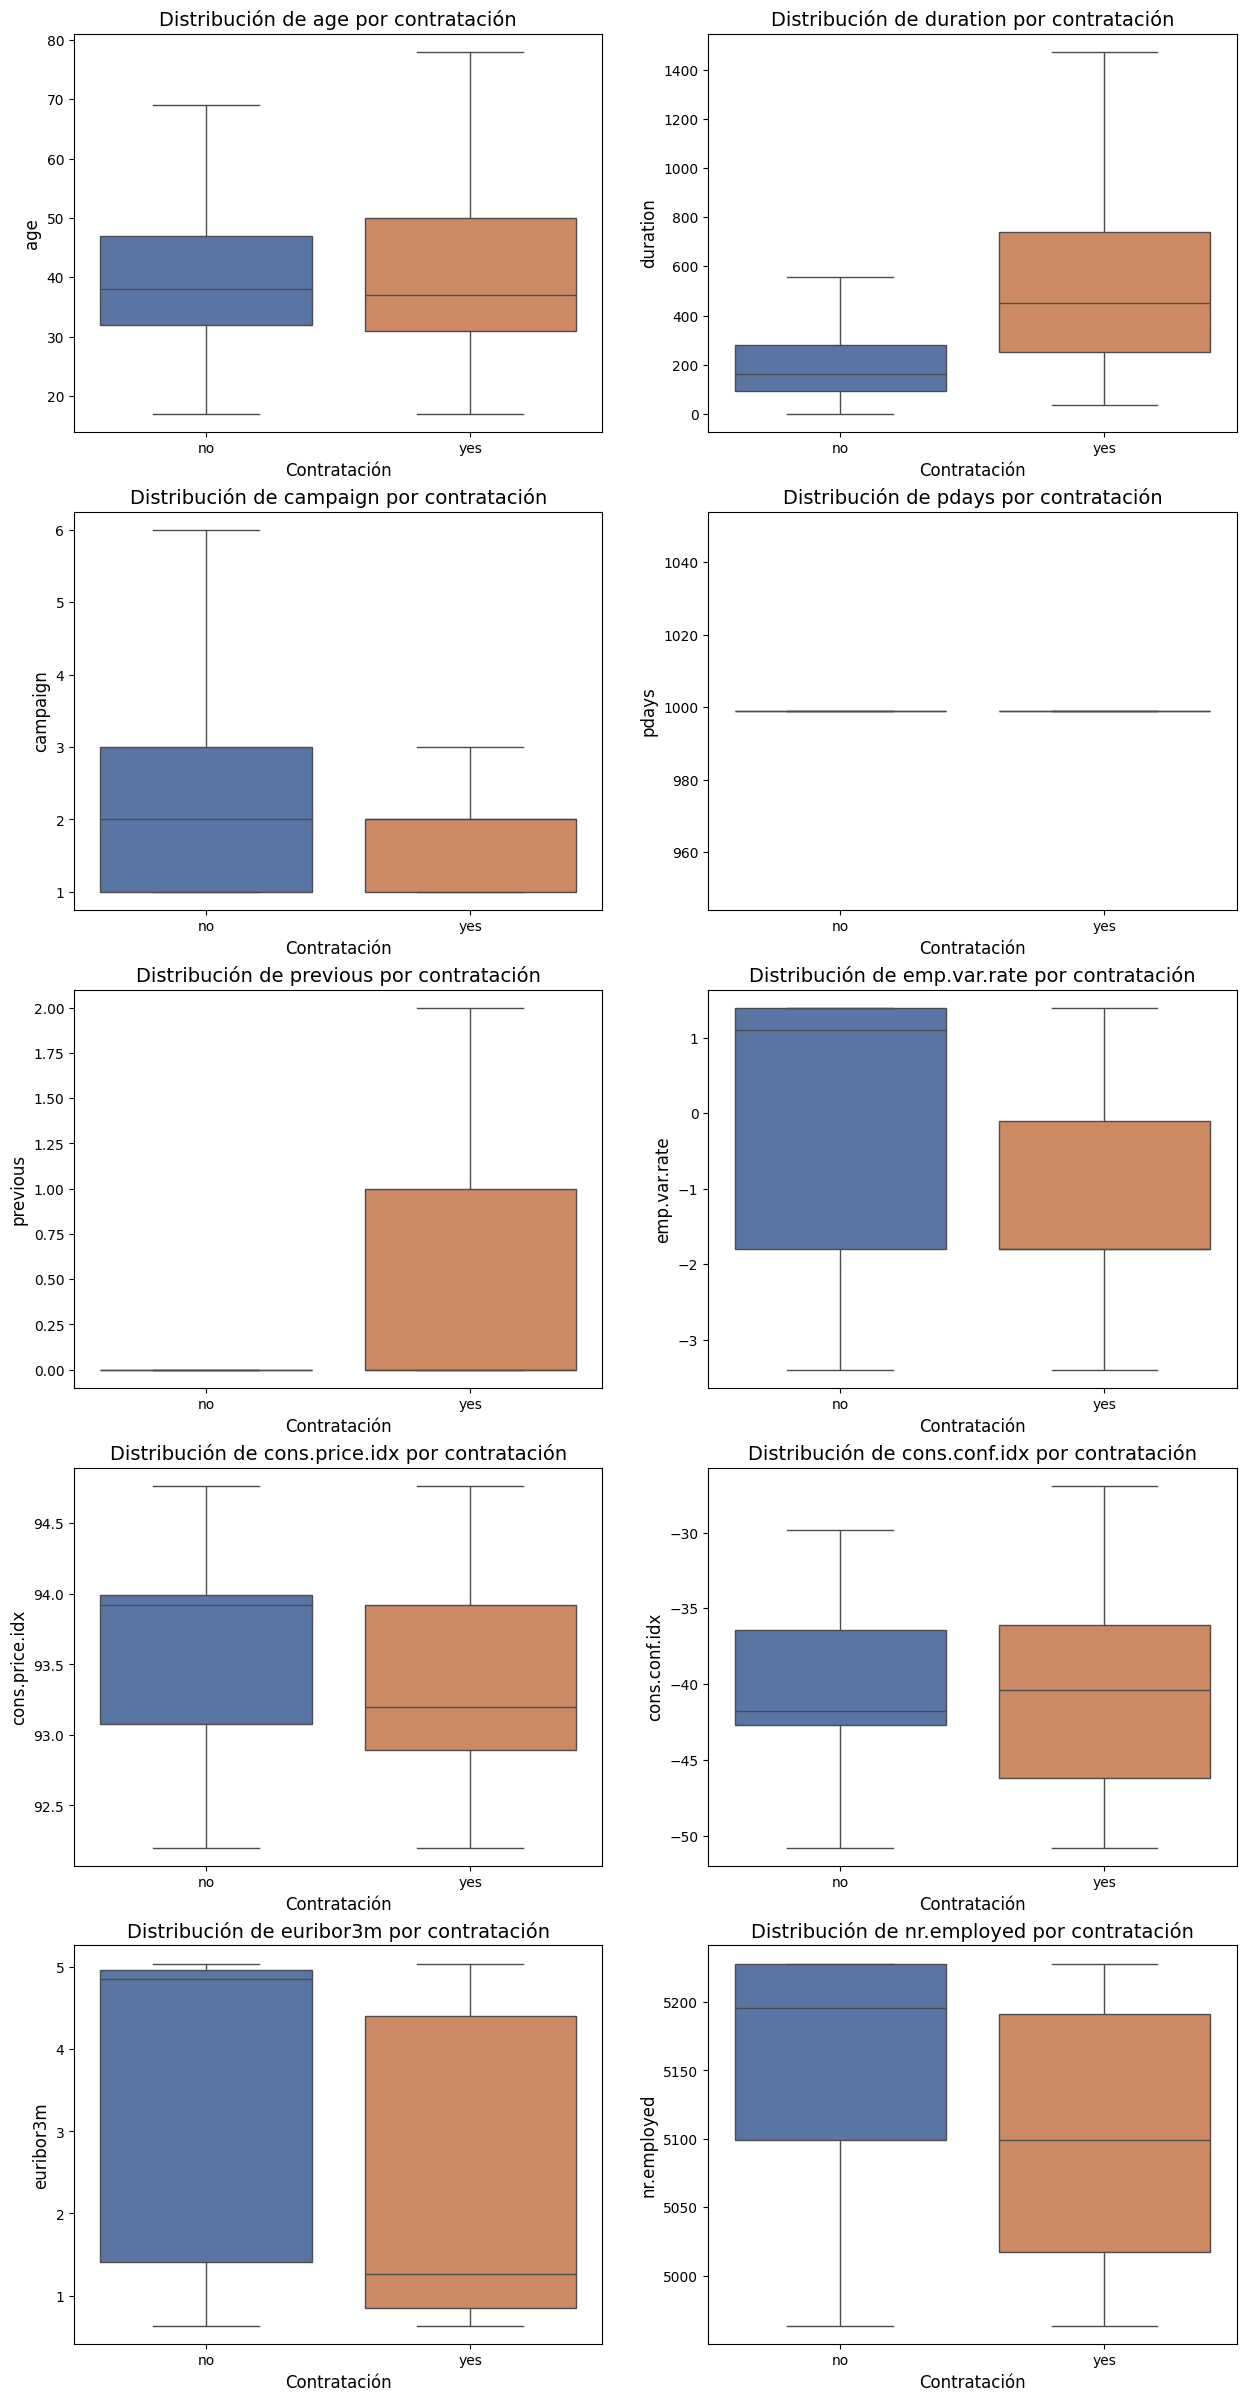

In [76]:
num_colum = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

n_columnas = 2
n_filas = int(np.ceil(len(num_colum) / n_columnas))

fig, axes = plt.subplots(n_filas, n_columnas, figsize=(15, 6 * n_filas))
axes = axes.flatten()

for i, col in enumerate(num_colum):
    
    sns.boxplot(data=df, x='y', y=col, ax=axes[i], showfliers=False, palette='deep')
    
    axes[i].set_title(f'Distribución de {col} por contratación', fontsize=14)
    axes[i].set_xlabel('Contratación', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)


In [77]:
# Columnas categóricas a factorizar

cat_cols = ["job","marital","education","default","housing","loan","contact", "month","day_of_week","poutcome","y"]

for col in cat_cols:
   df[col + "_n"] = pd.factorize(df[col])[0]

# Variables numéricas 
num_variables = [c + "_n" for c in cat_cols] + ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

In [78]:
# Escalado MinMax
scaler = MinMaxScaler()
df_scal = pd.DataFrame(scaler.fit_transform(df[num_variables]), columns=num_variables, index=df.index)

df_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [79]:
# deature selecion

X = df_scal.drop("y_n", axis=1)
y = df_scal["y_n"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

selector = SelectKBest(score_func=chi2, k=5).fit(X_train, y_train)

selected_cols = X_train.columns[selector.get_support()]

X_train_sel = pd.DataFrame(selector.transform(X_train), columns=selected_cols)
X_test_sel  = pd.DataFrame(selector.transform(X_test),  columns=selected_cols)

X_train_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,0.000000,0.019497,0.203781
1,0.0,0.0,1.000000,0.981183,1.000000
2,0.0,0.0,0.333333,0.138291,0.512287
3,0.0,0.0,0.937500,0.956926,0.859735
4,0.0,0.0,0.937500,0.957379,0.859735


In [80]:
X_test_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.5,0.142857,0.333333,0.150759,0.512287
1,0.0,0.000000,0.937500,0.958059,0.859735
2,0.5,0.142857,0.333333,0.153933,0.512287
3,0.0,0.000000,1.000000,0.982317,1.000000
4,0.0,0.000000,1.000000,0.981410,1.000000


In [81]:
X_train_sel["y_n"] = y_train.values
X_test_sel["y_n"]  = y_test.values

# Guardar archivos
paths = {"train": "../data/processed/clean_train.csv","test":  "../data/processed/clean_test.csv"}

X_train_sel.to_csv(paths["train"], index=False)
X_test_sel.to_csv(paths["test"], index=False)


# Modelo de regresión logística

In [82]:

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.0,0.000000,0.019497,0.203781,1.0
1,0.0,0.0,1.000000,0.981183,1.000000,0.0
2,0.0,0.0,0.333333,0.138291,0.512287,0.0
3,0.0,0.0,0.937500,0.956926,0.859735,0.0
4,0.0,0.0,0.937500,0.957379,0.859735,0.0


In [83]:
X_train = train_data.drop("y_n", axis=1)
y_train = train_data["y_n"]
X_test  =test_data.drop("y_n", axis=1)
y_test  = test_data["y_n"]

In [84]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [85]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.], shape=(4119,))

In [86]:
accuracy_score(y_test, y_pred)

0.8953629521728574

## Optimización del modelo

In [97]:
hyperparam = [{"penalty": ["l2"],
               "solver": ["lbfgs", "newton-cg", "sag", "saga", "liblinear"],
               "C": [0.001, 0.01, 0.1, 1, 10, 100]},
             {"penalty": ["l1"],
              "solver": ["liblinear", "saga"],
              "C": [0.001, 0.01, 0.1, 1, 10]},
             {"penalty": ["elasticnet"],
              "solver": ["saga"],
              "l1_ratio": [0.2, 0.5, 0.8],
              "C": [0.01, 0.1, 1]}]

In [100]:
grid = GridSearchCV(estimator=model, param_grid=hyperparam,scoring="accuracy", cv=10,n_jobs=-1, refit=True, verbose=1)

In [101]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


,estimator,LogisticRegression()
,param_grid,"[{'C': [0.001, 0.01, ...], 'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg', ...]}, {'C': [0.001, 0.01, ...], 'penalty': ['l1'], 'solver': ['liblinear', 'saga']}, ...]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,10
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'elasticnet'


In [102]:
best_model = grid.best_estimator_

In [103]:
y_pred = best_model.predict(X_test)

In [ ]:
# Métricas
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

In [106]:
# Resultados
display(pd.DataFrame([{"accuracy": acc}]))
display(pd.DataFrame(report).transpose())
display(pd.DataFrame(cm, index=["true_0","true_1"], columns=["pred_0","pred_1"]))
display(pd.DataFrame({"best_params": [grid.best_params_]}))

,accuracy
0,0.897548


,precision,recall,f1-score,support
0.0,0.902063,0.992343,0.945052,3657.000000
1.0,0.708333,0.147186,0.243728,462.000000
accuracy,0.897548,0.897548,0.897548,0.897548
macro avg,0.805198,0.569765,0.594390,4119.000000
weighted avg,0.880334,0.897548,0.866389,4119.000000


,pred_0,pred_1
true_0,3629,28
true_1,394,68


,best_params
0,"{'C': 0.1, 'l1_ratio': 0.2, 'penalty': 'elasti..."


In [107]:
with open("../models/logistic_grid_optimized.sav", "wb") as f:
    pickle.dump(best_model, f)

display(pd.DataFrame({"model_saved_path": ["../models/logistic_grid_optimized.sav"]}))

,model_saved_path
0,../models/logistic_grid_optimized.sav
